# Sesame Weed Detecting and Location

The goal of this project is to detect sesame weed in the field and locate the weed in the field.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

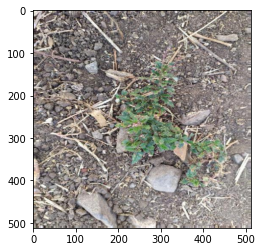

In [2]:
path = 'dataset/agri_data/data/'
data = [os.path.join(path, x) for x in os.listdir(path)]
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2RGB))


In [3]:
images

['dataset/agri_data/data/agri_0_1009.jpeg',
 'dataset/agri_data/data/agri_0_1017.jpeg',
 'dataset/agri_data/data/agri_0_1018.jpeg',
 'dataset/agri_data/data/agri_0_1020.jpeg',
 'dataset/agri_data/data/agri_0_1024.jpeg',
 'dataset/agri_data/data/agri_0_1026.jpeg',
 'dataset/agri_data/data/agri_0_1028.jpeg',
 'dataset/agri_data/data/agri_0_1041.jpeg',
 'dataset/agri_data/data/agri_0_1053.jpeg',
 'dataset/agri_data/data/agri_0_106.jpeg',
 'dataset/agri_data/data/agri_0_1068.jpeg',
 'dataset/agri_data/data/agri_0_1079.jpeg',
 'dataset/agri_data/data/agri_0_1082.jpeg',
 'dataset/agri_data/data/agri_0_1083.jpeg',
 'dataset/agri_data/data/agri_0_1094.jpeg',
 'dataset/agri_data/data/agri_0_1095.jpeg',
 'dataset/agri_data/data/agri_0_110.jpeg',
 'dataset/agri_data/data/agri_0_1114.jpeg',
 'dataset/agri_data/data/agri_0_1119.jpeg',
 'dataset/agri_data/data/agri_0_1123.jpeg',
 'dataset/agri_data/data/agri_0_1129.jpeg',
 'dataset/agri_data/data/agri_0_113.jpeg',
 'dataset/agri_data/data/agri_0_113

Converting the data into a dataframe for easy manipulation.

In [4]:
df = pd.DataFrame(columns=['image_name', 'object', 'x_cen', 'y_cen', 'w', 'h'])
i = 0
for id in tqdm(images):
    label = open(id[:-5] + '.txt', 'r')
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]

    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i, 'image_name'] = id[23:]
        df.loc[i, 'object'] = int(ind_label[0])
        df.loc[i, 'x_cen'] = float(ind_label[1])
        df.loc[i, 'y_cen'] = float(ind_label[2])
        df.loc[i, 'w'] = float(ind_label[3])
        df.loc[i, 'h'] = float(ind_label[4])
        i += 1

100%|██████████| 1300/1300 [00:01<00:00, 1195.64it/s]


In [5]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,agri_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125
1,agri_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906
2,agri_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766
3,agri_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328
4,agri_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703


Converting dataframe into Pascal-voc format

In [6]:
#column name for pascal-voc dataframe
column_name = [
    'filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'
]

pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):

    pascal_voc.loc[i, 'filename'] = df.loc[i, 'image_name']
    pascal_voc.loc[i, 'width'] = 512
    pascal_voc.loc[i, 'height'] = 512
    if df.loc[i, 'object'] == 0:
        pascal_voc.loc[i, 'class'] = 'crop'
    else:
        pascal_voc.loc[i, 'class'] = 'weed'
    pascal_voc.loc[i, 'xmin'] = int(
        (df.loc[i, 'x_cen'] - df.loc[i, 'w'] / 2) * 512)
    pascal_voc.loc[i, 'ymin'] = int(
        (df.loc[i, 'y_cen'] - df.loc[i, 'h'] / 2) * 512)
    pascal_voc.loc[i, 'xmax'] = int(
        (df.loc[i, 'x_cen'] + df.loc[i, 'w'] / 2) * 512)
    pascal_voc.loc[i, 'ymax'] = int(
        (df.loc[i, 'y_cen'] + df.loc[i, 'h'] / 2) * 512)


100%|██████████| 2072/2072 [00:01<00:00, 1568.19it/s]


In [7]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_1009.jpeg,512,512,weed,172,119,449,391
1,agri_0_1017.jpeg,512,512,weed,8,4,500,390
2,agri_0_1018.jpeg,512,512,weed,20,84,434,409
3,agri_0_1020.jpeg,512,512,weed,66,23,440,336
4,agri_0_1024.jpeg,512,512,weed,161,76,453,381
...,...,...,...,...,...,...,...,...
2067,agri_0_9963.jpeg,512,512,weed,58,80,455,336
2068,agri_0_9971.jpeg,512,512,weed,45,132,228,311
2069,agri_0_9971.jpeg,512,512,weed,52,355,227,512
2070,agri_0_9971.jpeg,512,512,weed,272,80,458,310


Visualizaing some labels to make sure everything worked

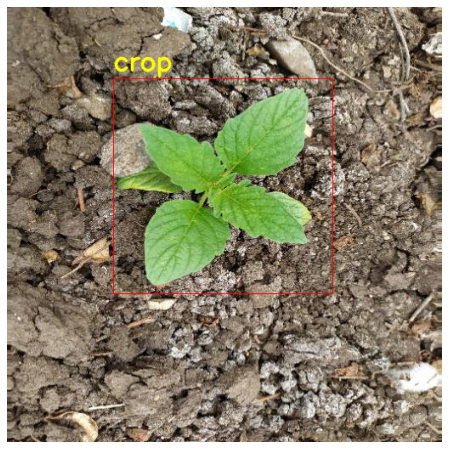

In [8]:
any_index_number = 5  #change this number for different images
test_img = cv2.cvtColor(
    cv2.imread(path + pascal_voc.loc[any_index_number, 'filename']),
    cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename'] == pascal_voc.loc[
    any_index_number, 'filename']].reset_index(drop=True)
for i in range(len(test_df)):

    rec = cv2.rectangle(test_img,
                        (test_df.loc[i, 'xmin'], test_df.loc[i, 'ymin']),
                        (test_df.loc[i, 'xmax'], test_df.loc[i, 'ymax']),
                        (255, 0, 0), 1, 1)
    text = cv2.putText(rec, test_df.loc[i, 'class'],
                       (test_df.loc[i, 'xmin'], test_df.loc[i, 'ymin'] - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2,
                       cv2.LINE_AA)

plt.figure(figsize=(8, 8))
plt.imshow(text)
plt.axis('off')
plt.show()

## Data Loading
Here we will create the tensors for the images and the labels. 

The input images should be 4D numpy arrays of shape `(batch_size, height, width, channels)`, where `batch_size` is the number of images in the batch, `height` and `width` are the dimensions of the input images, and `channels` is the number of color channels (3 for RGB images).

In [9]:
# Here are the images
images

['dataset/agri_data/data/agri_0_1009.jpeg',
 'dataset/agri_data/data/agri_0_1017.jpeg',
 'dataset/agri_data/data/agri_0_1018.jpeg',
 'dataset/agri_data/data/agri_0_1020.jpeg',
 'dataset/agri_data/data/agri_0_1024.jpeg',
 'dataset/agri_data/data/agri_0_1026.jpeg',
 'dataset/agri_data/data/agri_0_1028.jpeg',
 'dataset/agri_data/data/agri_0_1041.jpeg',
 'dataset/agri_data/data/agri_0_1053.jpeg',
 'dataset/agri_data/data/agri_0_106.jpeg',
 'dataset/agri_data/data/agri_0_1068.jpeg',
 'dataset/agri_data/data/agri_0_1079.jpeg',
 'dataset/agri_data/data/agri_0_1082.jpeg',
 'dataset/agri_data/data/agri_0_1083.jpeg',
 'dataset/agri_data/data/agri_0_1094.jpeg',
 'dataset/agri_data/data/agri_0_1095.jpeg',
 'dataset/agri_data/data/agri_0_110.jpeg',
 'dataset/agri_data/data/agri_0_1114.jpeg',
 'dataset/agri_data/data/agri_0_1119.jpeg',
 'dataset/agri_data/data/agri_0_1123.jpeg',
 'dataset/agri_data/data/agri_0_1129.jpeg',
 'dataset/agri_data/data/agri_0_113.jpeg',
 'dataset/agri_data/data/agri_0_113

In [10]:
# Define the desired height and width of the images
height, width = 512, 512

# Define the number of channels in the images
channels = 3

# Initialize an empty numpy array to store the images
imageData = np.empty((len(images), height, width, channels))

In [11]:
# Loop over the file names and read the images into the numpy array
for i, file_name in enumerate(images):
    image = cv2.imread(file_name)
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imageData[i] = image

# Normalize the pixel values of the images
imageData = imageData.astype('float32') / 255.0

In [12]:
imageData.shape

(1300, 512, 512, 3)

Now that we have the images in the tensor, we will need to create the labels in the tensor.
First lets find the max number of boxes in a single image.

In [13]:
labels

['dataset/agri_data/data/agri_0_1009.txt',
 'dataset/agri_data/data/agri_0_1017.txt',
 'dataset/agri_data/data/agri_0_1018.txt',
 'dataset/agri_data/data/agri_0_1020.txt',
 'dataset/agri_data/data/agri_0_1024.txt',
 'dataset/agri_data/data/agri_0_1026.txt',
 'dataset/agri_data/data/agri_0_1028.txt',
 'dataset/agri_data/data/agri_0_1041.txt',
 'dataset/agri_data/data/agri_0_1053.txt',
 'dataset/agri_data/data/agri_0_106.txt',
 'dataset/agri_data/data/agri_0_1068.txt',
 'dataset/agri_data/data/agri_0_1079.txt',
 'dataset/agri_data/data/agri_0_1082.txt',
 'dataset/agri_data/data/agri_0_1083.txt',
 'dataset/agri_data/data/agri_0_1094.txt',
 'dataset/agri_data/data/agri_0_1095.txt',
 'dataset/agri_data/data/agri_0_110.txt',
 'dataset/agri_data/data/agri_0_1114.txt',
 'dataset/agri_data/data/agri_0_1119.txt',
 'dataset/agri_data/data/agri_0_1123.txt',
 'dataset/agri_data/data/agri_0_1129.txt',
 'dataset/agri_data/data/agri_0_113.txt',
 'dataset/agri_data/data/agri_0_1130.txt',
 'dataset/agri

In [14]:
# Define the number of classes
num_classes = 2

# Lets see how many labels there are max for a single image
max_labels = 0
max_label_file = ''
for i in range(len(labels)):
    with open(labels[i], 'r') as file:
        curLabels = 0
        for line in file:
            curLabels += 1
        if curLabels > max_labels:
            max_labels = curLabels
            max_label_file = labels[i]

print(max_labels)
print(max_label_file)

19
dataset/agri_data/data/agri_0_14.txt


The ground-truth bounding boxes should be 3D numpy arrays of shape `(batch_size, num_boxes, 4)`, where `batch_size` is the number of images in the batch, `num_boxes` is the maximum number of ground-truth boxes in any image, and `4` represents the four coordinates of each bounding box `(xmin, ymin, xmax, ymax)`. If an image has fewer than num_boxes ground-truth boxes, the remaining boxes should be padded with zeros.

Batch size should also be 1300, since we have 1300 images.

In [15]:
labelBoxes = np.zeros((len(labels), max_labels, 4))
labelData = np.zeros((len(labels), max_labels, num_classes))

for i, file_name in enumerate(images):
    name = file_name[23:]

    # Now we find all the rows in the dataframe with the file name as the image name
    # and add it to the labelBoxes array

    # First we find the rows
    rows = pascal_voc[pascal_voc['filename'] == name].reset_index(drop=True)

    # Now we add the rows to the labelBoxes array
    for j in range(len(rows)):
        labelBoxes[i][j][0] = rows.loc[j, 'xmin']
        labelBoxes[i][j][1] = rows.loc[j, 'ymin']
        labelBoxes[i][j][2] = rows.loc[j, 'xmax']
        labelBoxes[i][j][3] = rows.loc[j, 'ymax']

        # Now we add the class to the labelData array
        if rows.loc[j, 'class'] == 'crop':
            labelData[i][j][0] = 1
        else:
            labelData[i][j][1] = 1

labelBoxes.shape


(1300, 19, 4)

In [16]:
labelData.shape

(1300, 19, 2)

In [17]:
# Lets see if we did this correctly
print(labelBoxes[0])
print(labelData[0])


[[172. 119. 449. 391.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]
[[0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Now we just need to normalize the images and the labels. Where 0,0 represents the top left corner of the image and 1,1 represents the bottom right corner of the image.

In [18]:
labelBoxes = labelBoxes.astype('float32')
# Since the size of the image is 512x512, we divide the coordinates by 512
labelBoxes = labelBoxes / 512.0

labelBoxes[0][0]


array([0.3359375 , 0.23242188, 0.8769531 , 0.7636719 ], dtype=float32)

In [19]:
from tensorflow.keras.applications import MobileNetV2
from keras.optimizers import Adam
from keras_cv.models.object_detection.faster_rcnn import FasterRCNN
import keras_cv
import tensorflow as tf


In [20]:
# Define the number of classes and bounding box format
num_classes = 2
bbox_format = "xyxy"

In [21]:
model = FasterRCNN(classes=num_classes,
                   bounding_box_format=bbox_format,)


In [22]:
# Compile the model with appropriate loss functions and optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              box_loss=tf.keras.losses.Huber(delta=1.0),
              classification_loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              rpn_box_loss=tf.keras.losses.Huber(delta=1.0),
              rpn_classification_loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))



Because of how large the dataset is, we need to make a generator to load the data in batches. This will allow us to train the model without running out of memory.

In [23]:
from tensorflow.keras.utils import Sequence


class DataGenerator(Sequence):
    def __init__(self, image_data, label_boxes, label_classes, batch_size):
        self.image_data = image_data
        self.label_boxes = label_boxes
        self.label_classes = label_classes
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.image_data) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = {'image': self.image_data[idx * self.batch_size:(idx + 1) * self.batch_size]}
        batch_y = {'classes': self.label_classes[idx * self.batch_size:(idx + 1) * self.batch_size],
                   'boxes': self.label_boxes[idx * self.batch_size:(idx + 1) * self.batch_size]}
        return batch_x, batch_y

In [24]:
train_gen = DataGenerator(imageData, labelBoxes, labelData, 2)

In [25]:
model.fit(
    train_gen,
    batch_size=1,
    epochs=10,
    verbose=1,
    callbacks=None,
    shuffle=True,
)

KeyError: 'Exception encountered when calling layer "faster_rcnn" "                 f"(type FasterRCNN).\n\n0\n\nCall arguments received by layer "faster_rcnn" "                 f"(type FasterRCNN):\n  • images={\'image\': \'tf.Tensor(shape=(2, 512, 512, 3), dtype=float32)\'}\n  • training=False'